In [773]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path


%matplotlib inline

In [774]:
# Reading In

In [775]:
whale_returns_df = pd.read_csv('whale_returns.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)

In [776]:
algo_returns_df = pd.read_csv('algo_returns.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)

In [777]:
sp500_history_df = pd.read_csv('sp500_history.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)

In [778]:
# Cleaning whale_returns_df

In [779]:
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [780]:
whale_returns_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [781]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [782]:
whale_returns_df.dropna(inplace=True)

In [783]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [784]:
#Cleaning algo_returns_df 

In [785]:
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [786]:
algo_returns_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [787]:
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [788]:
algo_returns_df.dropna(inplace=True)

In [789]:
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [790]:
# Cleaning and Modifying sp500_history_df

In [791]:
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [792]:
sp500_history_df.sort_index()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [793]:
sp500_history_df.dtypes

Close    object
dtype: object

In [794]:
sp500_history_df['Close'] = sp500_history_df['Close'].str.strip('$')

In [795]:
sp500_history_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [796]:
sp500_history_df["Close"] = pd.to_numeric(sp500_history_df["Close"], downcast="float")

In [797]:
sp500_history_df.sort_index()

,Close
Date,
2012-10-01,1444.489990
2012-10-02,1445.750000
2012-10-03,1450.989990
2012-10-04,1461.400024
2012-10-05,1460.930054
...,...
2019-04-16,2907.060059
2019-04-17,2900.449951
2019-04-18,2905.030029


In [798]:
sp500_history_df.isnull()

,Close
Date,
2019-04-23,False
2019-04-22,False
2019-04-18,False
2019-04-17,False
2019-04-16,False
...,...
2012-10-05,False
2012-10-04,False
2012-10-03,False


In [799]:
sp500_history_df.isnull().sum()

Close    0
dtype: int64

In [800]:
sp500_history_df.dropna(inplace=True)

In [801]:
sp500_history_df.isnull().sum()

Close    0
dtype: int64

In [802]:
sp500_returns_df = sp500_history_df.pct_change()

In [803]:
sp500_returns_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [804]:
sp500_returns_df.isnull()

,Close
Date,
2019-04-23,True
2019-04-22,False
2019-04-18,False
2019-04-17,False
2019-04-16,False
...,...
2012-10-05,False
2012-10-04,False
2012-10-03,False


In [805]:
sp500_returns_df.isnull().sum()

Close    1
dtype: int64

In [806]:
sp500_returns_df.dropna(inplace=True)

In [807]:
sp500_returns_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [808]:
sp500_returns_df.isnull().sum()

Close    0
dtype: int64

In [809]:
sp500_returns_df.rename(columns={'Close':'SP500 Returns'}, inplace=True)

In [810]:
# Joining Together All Dataframes 

In [811]:
all_returns_df = pd.concat([sp500_returns_df, whale_returns_df, algo_returns_df], axis='columns', join='inner')

In [812]:
all_returns_df.head()

,SP500 Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2019-04-22,-0.008764,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936
2019-04-18,-0.001011,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229
2019-04-17,-0.001577,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
2019-04-16,0.002279,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
2019-04-15,-0.000509,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572


In [813]:
all_returns_df.sort_index()

,SP500 Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,0.004408,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.001195,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.014378,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.003929,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.017254,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303
...,...,...,...,...,...,...,...
2019-04-15,-0.000509,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572
2019-04-16,0.002279,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
2019-04-17,-0.001577,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228


In [814]:
# Plotting Daily Returns 

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

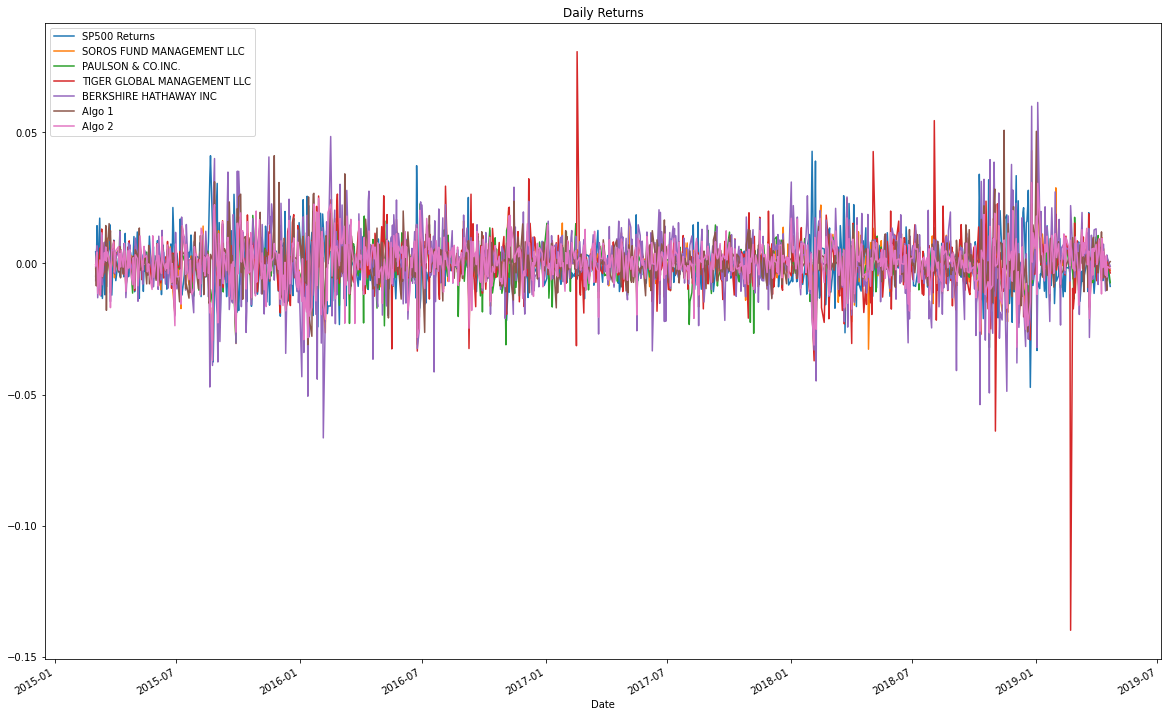

In [815]:
all_returns_df.plot(figsize=(20,13), title='Daily Returns')

In [816]:
# Cumulative Returns

In [817]:
cumulative_returns = (1 + all_returns_df).cumprod()  

In [818]:
cumulative_returns.sort_index(inplace=True)

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

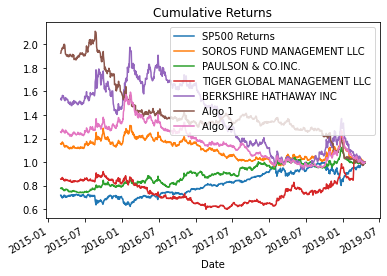

In [819]:
cumulative_returns.plot(title='Cumulative Returns')

In [820]:
# Box Plots

<AxesSubplot:>

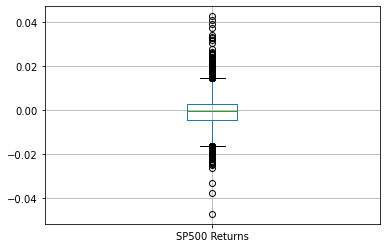

In [821]:
sp500_returns_df.boxplot()

<AxesSubplot:>

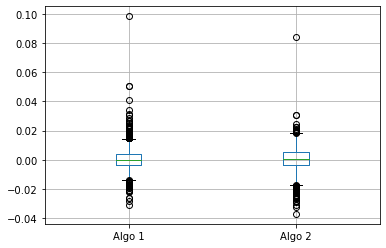

In [822]:
algo_returns_df.boxplot()

<AxesSubplot:>

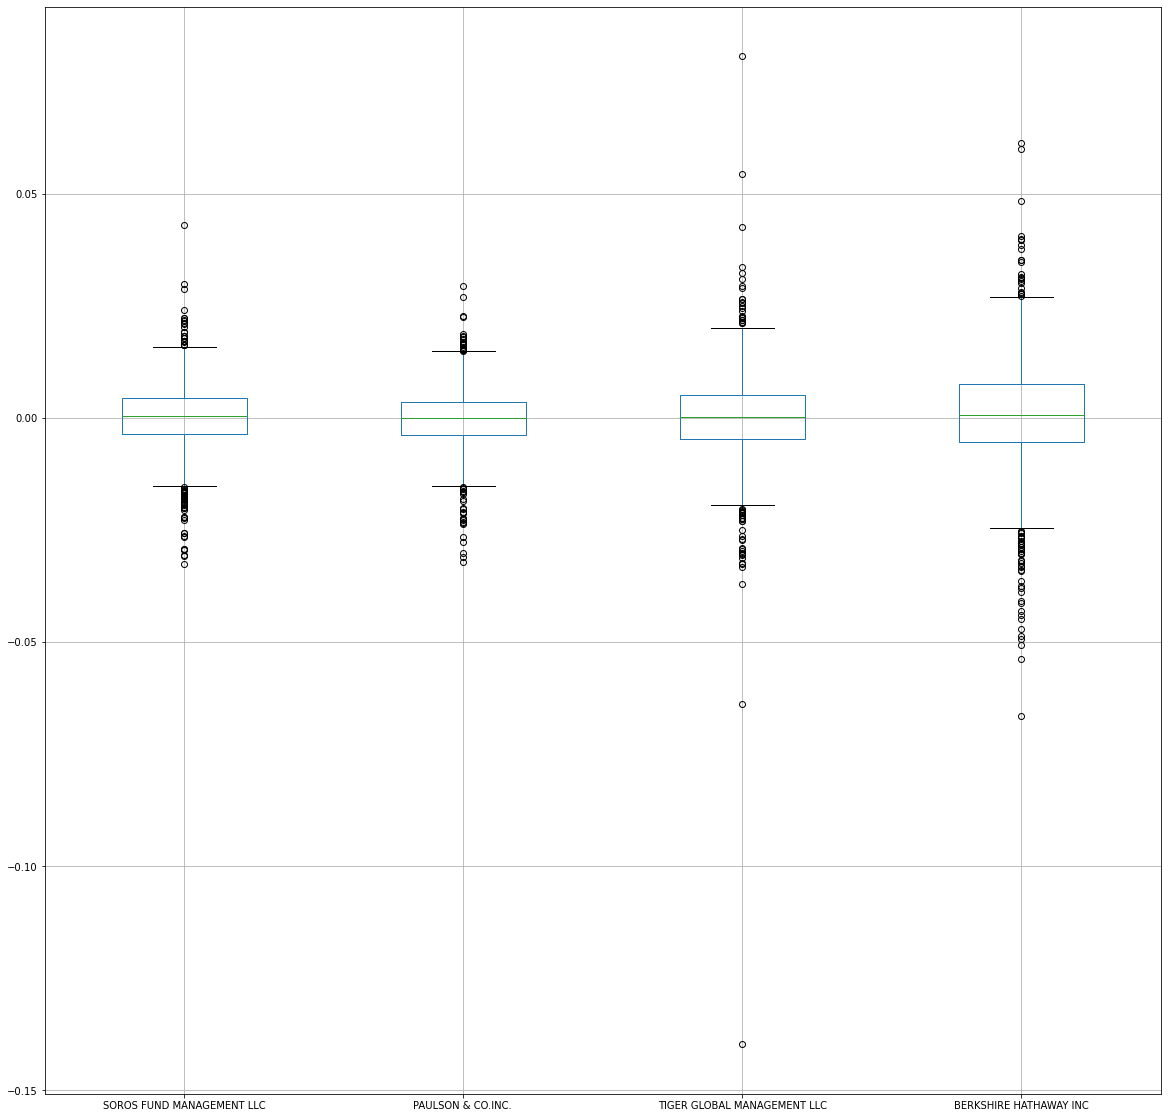

In [823]:
whale_returns_df.boxplot(figsize=(20,20))

In [824]:
# Daily Standard Deviations (including S&P500) 

In [825]:
sp500_returns_df.std() 

SP500 Returns    0.008135
dtype: float32

In [826]:
algo_returns_df.std()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [827]:
whale_returns_df.std() 

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [828]:
# ALGO 2, Tiger GLobal Management LLC, Berkshire Hathaway INC are riskier than S&P500 

In [829]:
# Annualized Standard Deviation 

In [830]:
sp500_returns_df.std() * np.sqrt(252)

SP500 Returns    0.129133
dtype: float32

In [831]:
algo_returns_df.std() * np.sqrt(252)

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [832]:
whale_returns_df.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [833]:
# Rolling Standard Deviations

In [834]:
sp500_returns_df.sort_index()

,SP500 Returns
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469
...,...
2019-04-15,-0.000509
2019-04-16,0.002279
2019-04-17,-0.001577


In [835]:
sp500_returns_df.rolling(window=21).std()

,SP500 Returns
Date,
2019-04-22,NaN
2019-04-18,NaN
2019-04-17,NaN
2019-04-16,NaN
2019-04-15,NaN
...,...
2012-10-05,0.009007
2012-10-04,0.007462
2012-10-03,0.007424


<AxesSubplot:title={'center':'Rolling 21-Day STD for SP500'}, xlabel='Date'>

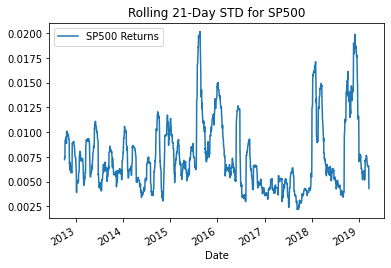

In [836]:
sp500_returns_df.rolling(window=21).std().plot(title='Rolling 21-Day STD for SP500')

In [837]:
algo_returns_df.rolling(window=21).std()

,Algo 1,Algo 2
Date,,
2014-06-05,NaN,NaN
2014-06-06,NaN,NaN
2014-06-09,NaN,NaN
2014-06-10,NaN,NaN
2014-06-11,NaN,NaN
...,...,...
2019-04-25,0.005801,0.005764
2019-04-26,0.005562,0.005700
2019-04-29,0.005251,0.005622


<AxesSubplot:title={'center':'21-Day Rolling STD For Algo Returns'}, xlabel='Date'>

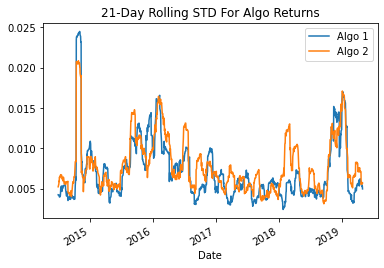

In [838]:
algo_returns_df.rolling(window=21).std().plot(title='21-Day Rolling STD For Algo Returns')

In [839]:
whale_returns_df.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641
2019-04-26,0.004117,0.005649,0.005424,0.006599
2019-04-29,0.004123,0.005374,0.005438,0.006584


<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of Portfolios'}, xlabel='Date'>

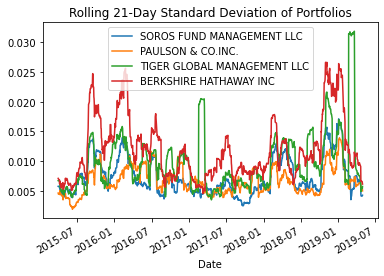

In [840]:
whale_returns_df.rolling(window=21).std().plot(title='Rolling 21-Day Standard Deviation of Portfolios')

In [841]:
# Correlations 

In [842]:
correlation = all_returns_df.corr()

In [843]:
all_returns_df.corr()

,SP500 Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SP500 Returns,1.000000,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192
SOROS FUND MANAGEMENT LLC,0.000574,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730
PAULSON & CO.INC.,0.013549,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160
BERKSHIRE HATHAWAY INC,-0.013856,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756
Algo 1,-0.033963,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852
Algo 2,-0.002192,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000


In [844]:
import seaborn as sns

<AxesSubplot:>

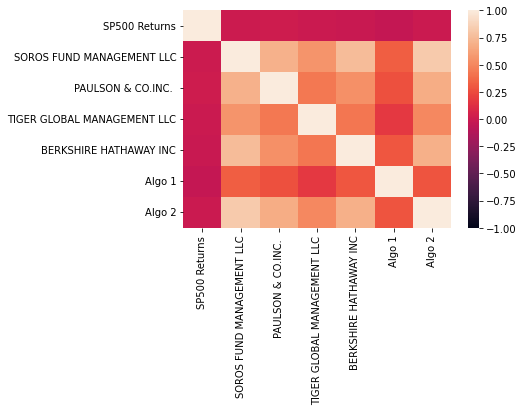

In [845]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [846]:
# Beta Calculation and Plotting  

In [847]:
covariance = all_returns_df['SOROS FUND MANAGEMENT LLC'].cov(all_returns_df['SP500 Returns'])

In [848]:
covariance

3.888627354443448e-08

In [849]:
variance = sp500_returns_df['SP500 Returns']

In [850]:
variance

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: SP500 Returns, Length: 1648, dtype: float32

In [851]:
beta = covariance / variance

In [852]:
beta

Date
2019-04-22   -0.000004
2019-04-18   -0.000038
2019-04-17   -0.000025
2019-04-16    0.000017
2019-04-15   -0.000076
                ...   
2012-10-05    0.000011
2012-10-04    0.000121
2012-10-03   -0.000005
2012-10-02   -0.000011
2012-10-01   -0.000045
Name: SP500 Returns, Length: 1648, dtype: float32

In [853]:
rolling_covariance = all_returns_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(all_returns_df['SP500 Returns'])

In [854]:
rolling_variance = all_returns_df['SP500 Returns'].rolling(window=60).var()

<AxesSubplot:title={'center':'Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

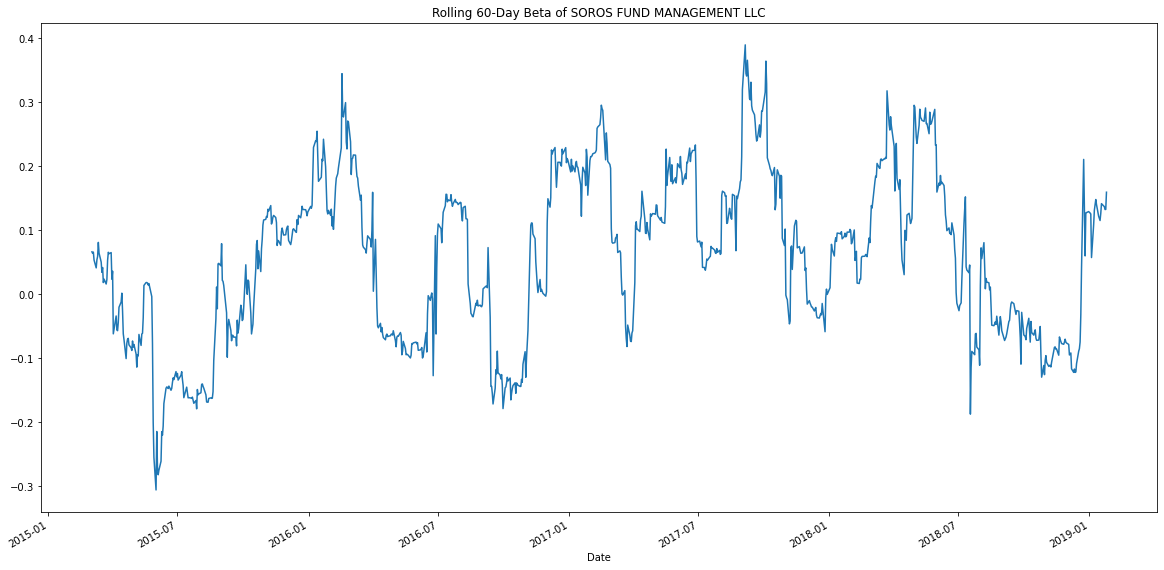

In [855]:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC')

In [856]:
# Exponentially Weighted Average 

In [857]:
ewm_covariance = all_returns_df['SOROS FUND MANAGEMENT LLC'].ewm(halflife=21).cov(all_returns_df['SP500 Returns'])

In [858]:
ewm_variance = all_returns_df['SP500 Returns'].ewm(halflife=21).var()

In [859]:
ewm_beta = ewm_covariance / ewm_variance

<AxesSubplot:title={'center':'EWM 60-Day Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

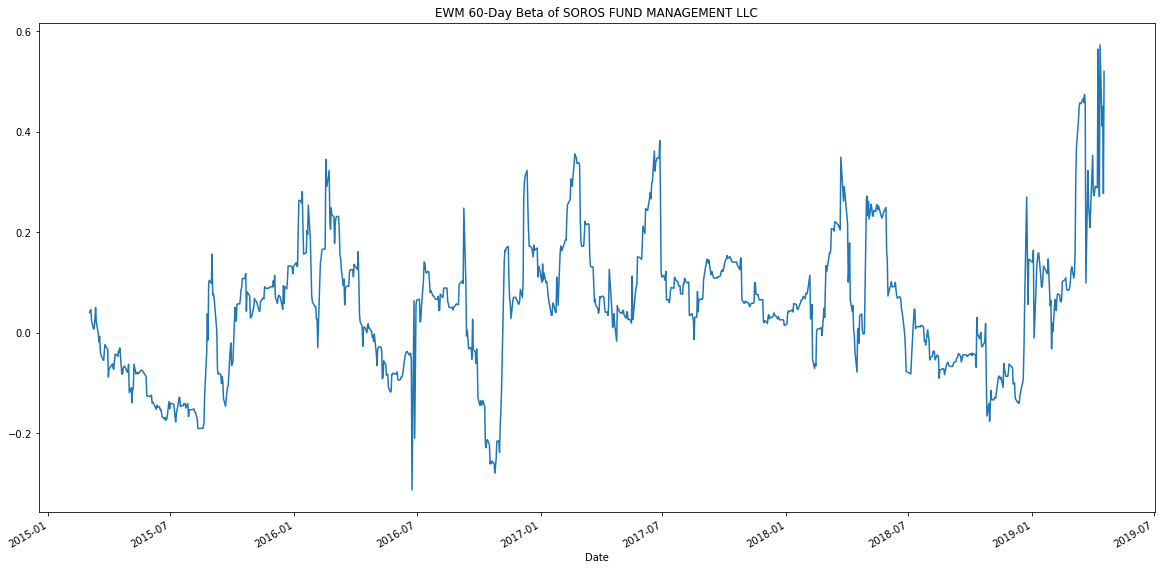

In [860]:
ewm_beta.plot(figsize=(20, 10), title='EWM 60-Day Beta of SOROS FUND MANAGEMENT LLC')

In [861]:
# Sharpe Ratios 

In [862]:
sharpe_ratios = (all_returns_df.mean() * 252) / (all_returns_df.std() * np.sqrt(252))

In [863]:
sharpe_ratios.head(10)

SP500 Returns                 -0.518583
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

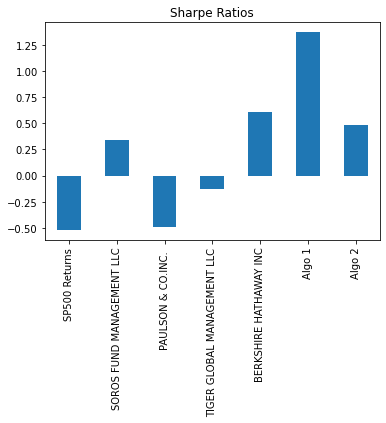

In [864]:
sharpe_ratios.plot.bar(title='Sharpe Ratios')

In [865]:
# Yes, Algo 1 and 2 have better sharpe ratios which means that they provide more consistently postive returns with lower volatility than the S&P 500 

In [866]:
#Reading in Stock Data 

In [867]:
tesla_price = pd.read_csv('Tesla - Sheet1.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)

In [868]:
facebook_price = pd.read_csv('Facebook - Sheet1.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)

In [869]:
google_price = pd.read_csv('Google.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)

In [870]:
#Combine Stock Data 

In [871]:
portfolio_prices = pd.concat([tesla_price, facebook_price, google_price], axis="columns", join="inner")

In [872]:
portfolio_prices.head()

,Close,Close,Close
Date,,,
2018-01-02 16:00:00,64.11,181.42,1073.21
2018-01-03 16:00:00,63.45,184.67,1091.52
2018-01-04 16:00:00,62.92,184.33,1095.76
2018-01-05 16:00:00,63.32,186.85,1110.29
2018-01-08 16:00:00,67.28,188.28,1114.21


In [873]:
portfolio_prices.columns = ['TSLA', 'FB', 'GOOGL']

In [874]:
portfolio_prices.head()

,TSLA,FB,GOOGL
Date,,,
2018-01-02 16:00:00,64.11,181.42,1073.21
2018-01-03 16:00:00,63.45,184.67,1091.52
2018-01-04 16:00:00,62.92,184.33,1095.76
2018-01-05 16:00:00,63.32,186.85,1110.29
2018-01-08 16:00:00,67.28,188.28,1114.21


In [875]:
# Get Daily Returns 

In [876]:
portfolio_returns = portfolio_prices.pct_change()

In [877]:
portfolio_returns.head()

,TSLA,FB,GOOGL
Date,,,
2018-01-02 16:00:00,NaN,NaN,NaN
2018-01-03 16:00:00,-0.010295,0.017914,0.017061
2018-01-04 16:00:00,-0.008353,-0.001841,0.003884
2018-01-05 16:00:00,0.006357,0.013671,0.013260
2018-01-08 16:00:00,0.062539,0.007653,0.003531


In [878]:
portfolio_returns.dropna(inplace=True)

In [879]:
portfolio_returns.head()

,TSLA,FB,GOOGL
Date,,,
2018-01-03 16:00:00,-0.010295,0.017914,0.017061
2018-01-04 16:00:00,-0.008353,-0.001841,0.003884
2018-01-05 16:00:00,0.006357,0.013671,0.013260
2018-01-08 16:00:00,0.062539,0.007653,0.003531
2018-01-09 16:00:00,-0.008026,-0.002178,-0.001274


In [880]:
# Do Weighted Returns and Adjust DataFrame 

In [881]:
equalWeights = [1/3, 1/3, 1/3]

In [882]:
my_portfolio_returns = portfolio_returns.dot(equalWeights)

In [883]:
my_portfolio_return = my_portfolio_returns.to_frame()

In [884]:
my_portfolio_return.columns = ['My Portfolio Returns']

In [885]:
my_portfolio_return.head()

,My Portfolio Returns
Date,
2018-01-03 16:00:00,0.008227
2018-01-04 16:00:00,-0.002103
2018-01-05 16:00:00,0.011096
2018-01-08 16:00:00,0.024574
2018-01-09 16:00:00,-0.003826


In [886]:
my_portfolio_return.index = my_portfolio_return.index.normalize()

In [887]:
my_portfolio_return.reset_index()

,Date,My Portfolio Returns
0,2018-01-03,0.008227
1,2018-01-04,-0.002103
2,2018-01-05,0.011096
3,2018-01-08,0.024574
4,2018-01-09,-0.003826
...,...,...
245,2018-12-24,-0.029971
246,2018-12-26,0.083221
247,2018-12-27,-0.007720
248,2018-12-28,0.013422


In [888]:
# Add DataFrame to Other Portfolio DataFrame 

In [889]:
total_returns_df = pd.concat([my_portfolio_return, all_returns_df], axis='columns', join='inner')

In [890]:
total_returns_df.head(1000)

,My Portfolio Returns,SP500 Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,,
2018-01-03,0.008227,-0.004012,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175
2018-01-04,-0.002103,-0.006985,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294
2018-01-05,0.011096,-0.001660,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405
2018-01-08,0.024574,-0.001301,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658
2018-01-09,-0.003826,0.001113,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091
...,...,...,...,...,...,...,...,...
2018-12-24,-0.029971,-0.047250,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745
2018-12-26,0.083221,-0.008490,0.042977,0.029338,0.030958,0.059909,0.022750,0.030822
2018-12-27,-0.007720,0.001243,0.004184,-0.007472,0.009149,0.004813,0.001571,0.000494


In [891]:
total_returns_df.dropna(inplace=True)

In [892]:
total_returns_df.head()

,My Portfolio Returns,SP500 Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,,
2018-01-03,0.008227,-0.004012,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175
2018-01-04,-0.002103,-0.006985,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294
2018-01-05,0.011096,-0.001660,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405
2018-01-08,0.024574,-0.001301,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658
2018-01-09,-0.003826,0.001113,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091


In [893]:
# Get Annualized Standard Deviation and Plot Rolling Standard Deviation 

In [894]:
total_returns_df.std() * np.sqrt(252)

My Portfolio Returns           0.322215
SP500 Returns                  0.171526
SOROS FUND MANAGEMENT LLC      0.157771
PAULSON & CO.INC.              0.118009
TIGER GLOBAL MANAGEMENT LLC    0.198544
BERKSHIRE HATHAWAY INC         0.240737
Algo 1                         0.120059
Algo 2                         0.142928
dtype: float64

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation by Portfolio'}, xlabel='Date'>

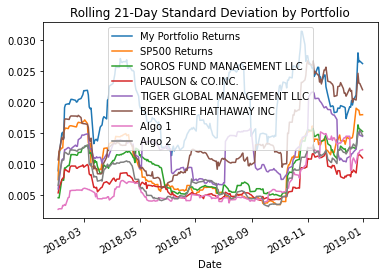

In [895]:
total_returns_df.rolling(window=21).std().plot(title='Rolling 21-Day Standard Deviation by Portfolio')

In [896]:
# Determine Correlation, Beta, and Sharpe Ratios 

In [897]:
total_returns_df.corr()

,My Portfolio Returns,SP500 Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
My Portfolio Returns,1.000000,0.048544,0.618688,0.548444,0.431959,0.728433,0.240359,0.632977
SP500 Returns,0.048544,1.000000,-0.002383,-0.026184,-0.037491,-0.051772,-0.075530,-0.038167
SOROS FUND MANAGEMENT LLC,0.618688,-0.002383,1.000000,0.785223,0.615549,0.802833,0.381654,0.846903
PAULSON & CO.INC.,0.548444,-0.026184,0.785223,1.000000,0.663716,0.678808,0.360494,0.817367
TIGER GLOBAL MANAGEMENT LLC,0.431959,-0.037491,0.615549,0.663716,1.000000,0.501406,0.186736,0.619016
BERKSHIRE HATHAWAY INC,0.728433,-0.051772,0.802833,0.678808,0.501406,1.000000,0.374323,0.800103
Algo 1,0.240359,-0.075530,0.381654,0.360494,0.186736,0.374323,1.000000,0.362932
Algo 2,0.632977,-0.038167,0.846903,0.817367,0.619016,0.800103,0.362932,1.000000


In [898]:
rolling_covariance_total = total_returns_df['My Portfolio Returns'].rolling(window=60).cov(all_returns_df['SP500 Returns'])

In [899]:
rolling_variance_total = total_returns_df['SP500 Returns'].rolling(window=60).var()

In [900]:
rolling_beta_total = rolling_covariance_total / rolling_variance_total

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}, xlabel='Date'>

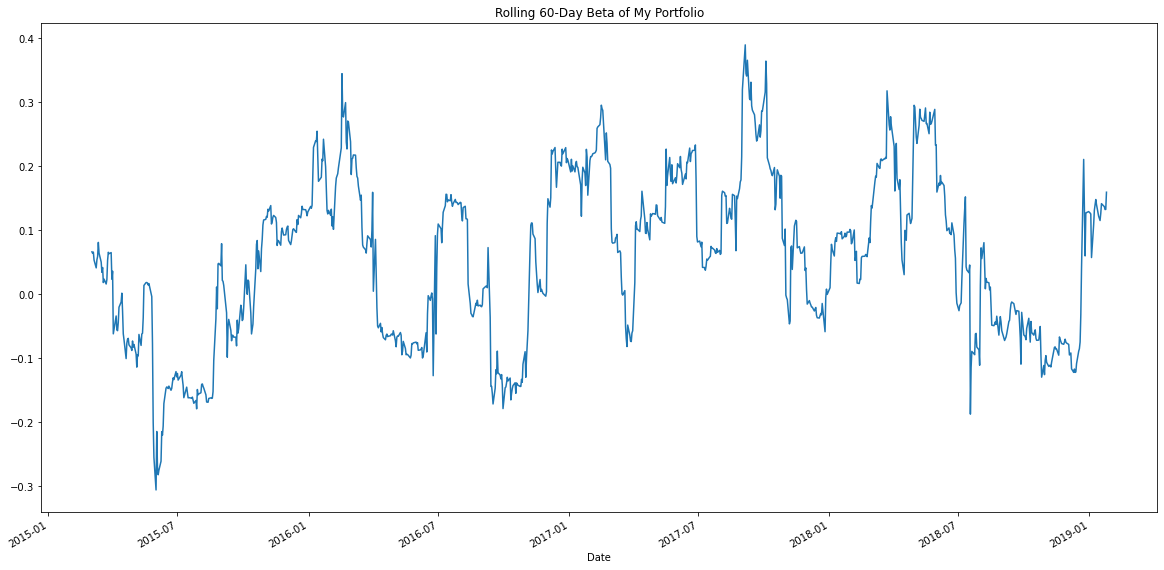

In [901]:
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

In [902]:
sharpe_ratios_total = (total_returns_df.mean() * 252) / (total_returns_df.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

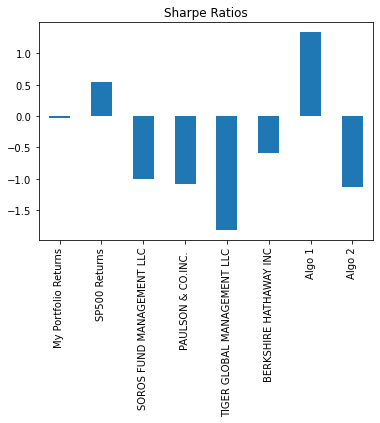

In [903]:
sharpe_ratios_total.plot.bar(title='Sharpe Ratios')

In [904]:
# My Portfolio does not fare too well as there is a very high standard deviation of my returns. My portfolio is volatile and does not compensate with adequate returns.  